## Main Question: What do covid case percentages look like compared to the percent of the population vaccinated in Arizona?

In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chisquare

In [15]:
# Import cleaned csv
csvfile1 = "Resources/Cleaned_Vaccine_Case_Data.csv"

# Add as DataFrame
main_df = pd.read_csv(csvfile1)
main_df

,Unnamed: 0,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...,...
339,360,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,361,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,362,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542
342,364,86505,8036,137,12.40,36.62,101-500,54,"11-1,000",23767


In [16]:
# Drop the "Unnamed: 0" column
del main_df["Unnamed: 0"]
main_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542
342,86505,8036,137,12.40,36.62,101-500,54,"11-1,000",23767


In [17]:
# Drop "1-10" values in "Total Case Count"
clean_df = main_df.drop(main_df.loc[main_df["Total Case Count"] == "1-10"].index)
#clean_df = main_df.loc[main_df["Total Case Count"] != "1-10"]
clean_df

# Add new column called "Case Rate"
clean_df["Case Rate"] = " "
clean_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,
...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,


#### Find COVID-19 case rate by zipcode (total cases / total population)

In [18]:
# Create empty list for case rate data, cases, and population
case_rates = []
cases = []
pop = []

# For loop to find rate for each zipcode
for index, row in clean_df.iterrows():
    # Get cases and population totals 
    cases = int(row["Total Case Count"])
    pop = int(row["Total Population"])
    # Take the number of cases and divide it by total population
    try:
        rates = cases / pop
        case_rates.append(rates)

    # If there is a population with 0, enter "0"
    except (ZeroDivisionError):
        case_rates.append(0)
# Store the case rates into dataframe
clean_df["Case Rate"] = case_rates
#clean_df["Case Rate"] = clean_df["Case Rate"].astype(float).map("{:.2f}%".format)
clean_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,0.180492
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,0.135260
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,0.120268
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,0.168007
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,0.145637
...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,0.120106
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,0.047847
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,0.047244
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,0.453881


### Find COVID-19 vaccine rate by zipcode (total vaccinated / total population)

In [19]:
# Drop "1-10" values in "Total Case Count"
vacc_df = clean_df.drop(clean_df.loc[clean_df["Total Vaccinated"] == "1-10"].index)
vacc_df

# Add new column called "Vaccine Case Rate"
vacc_df["Vaccine Rate"] = " "
vacc_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate,Vaccine Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,0.180492,
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,0.135260,
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,0.120268,
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,0.168007,
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,0.145637,
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,0.120106,
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,0.047847,
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,0.047244,
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,0.453881,


In [20]:
# Create empty list for vaccine rate data, cases, and population
vaccine_rates = []
total_vacc = []
population = []

# For loop to find rate for each zipcode
for index, row in vacc_df.iterrows():
    # Get cases and population totals 
    total_vacc = int(row["Total Vaccinated"])
    population = int(row["Total Population"])
    # Take the number of cases and divide it by total population
    try:
        vac_rate = total_vacc / population
        vaccine_rates.append(vac_rate)

    # If there is a population with 0, enter "0"
    except (ZeroDivisionError):
        vaccine_rates.append(0)
# Store the case rates into dataframe
vacc_df["Vaccine Rate"] = vaccine_rates
#vacc_df["Vaccine Rate"] = vacc_df["Vaccine Rate"].astype(float).map("{:.2f}%".format)
vacc_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate,Vaccine Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,0.180492,0.576303
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,0.135260,0.597571
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,0.120268,0.249210
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,0.168007,0.327072
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,0.145637,0.227575
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,0.120106,0.233722
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,0.047847,0.358852
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,0.047244,0.165354
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,0.453881,0.242009


### Total cases versus total vaccinated

In [21]:
# Organize columns to clean up dataframe 
#print(vacc_df.columns)
organized_df = vacc_df[['POSTCODE', 'Case Rate', 'Vaccine Rate', 'Total Population', 'Total Case Count', '% Cases Over Age 18', '% Cases Over Age 65', 'Total Cases Category','Total Vaccinated', 'Total      Vaccinated Category','Median Household Income']]
organized_df

,POSTCODE,Case Rate,Vaccine Rate,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,85003,0.180492,0.576303,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,85004,0.135260,0.597571,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,85006,0.120268,0.249210,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,85007,0.168007,0.327072,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,85008,0.145637,0.227575,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,0.120106,0.233722,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600
339,86444,0.047847,0.358852,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,86445,0.047244,0.165354,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,86502,0.453881,0.242009,1095,497,34.12,47.10,101-500,265,"11-1,000",18542


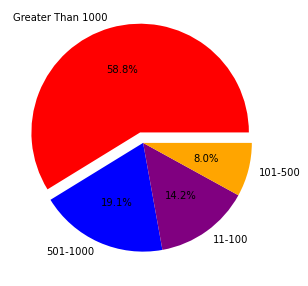

In [48]:
# Pie chart (percentage of cases in each category)
plt.figure(figsize=(10,5))
sizes = organized_df['Total Cases Category'].value_counts()

labels = organized_df['Total Cases Category'].unique()
colors = ["red", "blue", "purple", 'orange']
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

plt.show()

In [31]:
# New dataframe of top case rates
sorted_df = organized_df.sort_values(by=["Case Rate"], ascending=False).head(10)
sorted_df

,POSTCODE,Case Rate,Vaccine Rate,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
130,85336,2.427451,6.003922,510,1238,27.08,38.93,Greater Than 1000,3062,"1,001-5,000",44271
288,86029,1.428571,1.246753,77,110,38.40,51.02,101-500,96,"11-1,000",-
341,86502,0.453881,0.242009,1095,497,34.12,47.10,101-500,265,"11-1,000",18542
144,85350,0.435666,0.830169,22593,9843,130.60,198.88,Greater Than 1000,18756,"Greater Than 10,000",38416
280,86015,0.349359,1.275641,312,109,60.96,42.19,101-500,398,"11-1,000",-
180,85543,0.319538,0.415259,3552,1135,51.60,83.03,Greater Than 1000,1475,"1,001-5,000",43895
192,85607,0.272910,0.621830,15419,4208,62.69,87.76,Greater Than 1000,9588,"5,001-10,000",36218
203,85620,0.254328,0.617843,751,191,67.44,78.35,101-500,464,"11-1,000",37563
25,85034,0.251933,0.445788,5045,1271,33.61,57.70,Greater Than 1000,2249,"1,001-5,000",30130
66,85202,0.243905,0.301482,40364,9845,35.72,66.18,Greater Than 1000,12169,"Greater Than 10,000",51232


In [40]:
# New dataframe 
bottom_sorted_df = organized_df.sort_values(by=["Case Rate"]).head(10)
bottom_sorted_df

,POSTCODE,Case Rate,Vaccine Rate,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
135,85341,0.000000,0.000000,0,18,296.36,388.00,11-100,164,"11-1,000",-
342,86505,0.017048,0.006720,8036,137,12.40,36.62,101-500,54,"11-1,000",23767
336,86441,0.021665,0.167799,2354,51,19.53,24.12,11-100,395,"11-1,000",26591
186,85554,0.025818,0.278830,581,15,30.80,50.69,11-100,162,"11-1,000",32375
311,86332,0.027102,0.191372,1808,49,18.12,26.09,11-100,346,"11-1,000",38984
195,85611,0.027132,0.334302,1032,28,36.68,52.20,11-100,345,"11-1,000",64773
126,85332,0.027476,0.331425,1747,48,26.25,37.22,11-100,579,"11-1,000",42370
316,86337,0.032318,0.154755,1609,52,18.57,29.68,11-100,249,"11-1,000",34722
153,85362,0.032476,0.219215,739,24,22.28,32.32,11-100,162,"11-1,000",40893
128,85334,0.032759,0.112069,1160,38,19.67,34.92,11-100,130,"11-1,000",35469


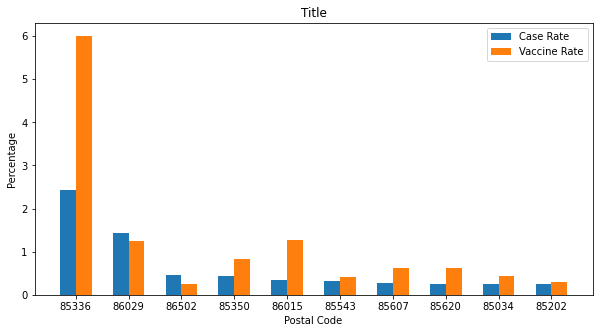

In [39]:
# Numbers of pairs of bars you want
N = 10

# Data on X-axis

# Specify the values of blue bars (height)
#blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
#orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, sorted_df['Case Rate'], width, label='Case Rate')
plt.bar(ind + width, sorted_df['Vaccine Rate'], width, label='Vaccine Rate')

plt.xlabel('Postal Code')
plt.ylabel('Percentage')
plt.title('Title')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, sorted_df["POSTCODE"])#('Xtick1', 'Xtick3', 'Xtick3'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

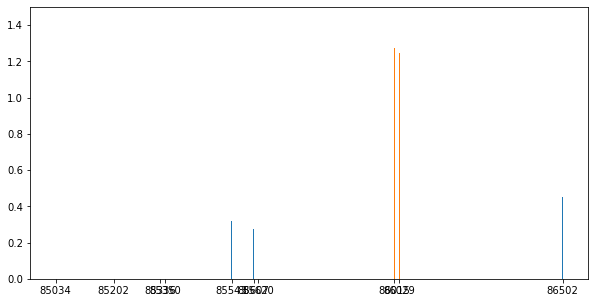

In [35]:
# Bar graph comparing case rate and vaccine rate
x = sorted_df["POSTCODE"]
y = sorted_df["Case Rate"]
z = sorted_df["Vaccine Rate"]
#plt.bar(x, y)
#plt.xticks(np.arange(min(x), max(x)+1, 5.0))

#fig, ax = plt.subplots(figsize=(36, 20))
#cases = ax.bar(x - width/2, organized_df["Case Rate"], width, label='COVID-19 Case Rate')
#vaccines = ax.bar(x + width/2, organized_df["Vaccine Rate"], width, label='COVID-19 Vaccine Rate')
'''
ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='b', align='center')
plt.ylim(0, 1)
'''

x = sorted_df["POSTCODE"]
width = 0.50
fig, ax = plt.subplots(figsize=(10, 5))
cases = ax.bar(x - width/2, sorted_df["Case Rate"], width, label='COVID-19 Case Rate')
vaccines = ax.bar(x + width/2, sorted_df["Vaccine Rate"], width, label='COVID-19 Vaccine Rate')
plt.ylim(0, 1.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
#plt.ylabel('Percentage', size= 20)
#plt.title('Case Rates and Vaccine Rates Per Zipcode')
#plt.xlabel("Zipcodes")
ax.set_xticks(x)

#ax.set_xticklabels(labels)
#ax.legend()
#plt.xticks(rotation='vertical')
#plt.subplots(figsize=(36,20))

#fig.tight_layout()

plt.show()


In [26]:
'''
# Chi squared???

# see if differences are statistically significant 

for i in organized_df.index:
    # Convert back into a number (no percentages)
    #vacc_df["Vaccine Rate"] = vacc_df["Vaccine Rate"].astype(float).map("{:.2f}%".format)
    # Case rate
    x = int(organized_df.iloc[i, 1])
    # Vaccine rate
    y = int(organized_df[i, 2])
    #prob = 0.95
    chi2(x, y)
#prob = 0.95

'''



'\n# Chi squared???\n\n# see if differences are statistically significant \n\nfor i in organized_df.index:\n    # Convert back into a number (no percentages)\n    #vacc_df["Vaccine Rate"] = vacc_df["Vaccine Rate"].astype(float).map("{:.2f}%".format)\n    # Case rate\n    x = int(organized_df.iloc[i, 1])\n    # Vaccine rate\n    y = int(organized_df[i, 2])\n    #prob = 0.95\n    chi2(x, y)\n#prob = 0.95\n\n'